<a href="https://colab.research.google.com/github/luisfernandorios/Actividades_Aprendizaje-/blob/main/IBM_Module__5_Model_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#DATA ANALYSIS WITH PYTHON
#Semana 8
#Model Evaluation

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway,pearsonr
from scipy import stats

In [3]:
path='https://raw.githubusercontent.com/luisfernandorios/Actividades_Aprendizaje-/main/imports-85.data'
df= pd.read_csv(path,sep=',',header=None)
headers=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
df.columns=headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
df=df.replace('?',np.NaN)
df=df.dropna(subset=['price'],axis=0)
df['price']=df['price'].astype('int64')

avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)
df[['horsepower']]=df[['horsepower']].astype('float')
df[['normalized-losses']]=df[['normalized-losses']].astype('float')
df[['bore']]=df[['bore']].astype('float')
df[['peak-rpm']]=df[['peak-rpm']].astype('float')
df[['stroke']]=df[['stroke']].astype('float')

df['normalized-losses'].replace(np.nan, df['normalized-losses'].mean(axis=0), inplace=True)
df['stroke'].replace(np.nan, df['stroke'].mean(axis=0), inplace=True)
df['bore'].replace(np.nan, df['bore'].mean(axis=0), inplace=True)
df['stroke'].replace(np.nan, df['stroke'].mean(axis=0), inplace=True)
df['num-of-doors'].replace(np.nan, df['num-of-doors'].value_counts().idxmax(), inplace=True)
df['peak-rpm'].replace(np.nan, df['peak-rpm'].mean(axis=0), inplace=True)

In [5]:
df = df.select_dtypes(exclude='object')
# df_objs = df.select_dtypes(include='object')
# df_objs = pd.get_dummies(df_objs,drop_first=True)
# df = pd.concat([df_nums,df_objs],axis=1)
df.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
X=df.drop(columns='price')
y=df['price']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

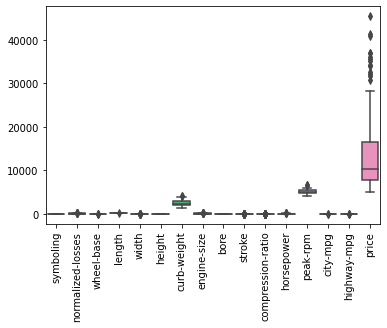

In [7]:
sns.boxplot(data=df)
plt.xticks(rotation=90)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler=StandardScaler()

In [12]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

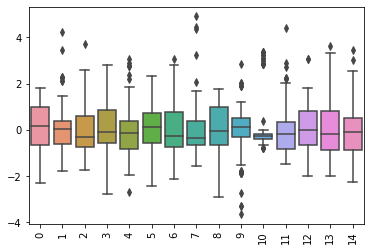

In [13]:
sns.boxplot(data=scaled_X_train)
plt.xticks(rotation=90)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
model= LinearRegression()

In [17]:
model.fit(scaled_X_train,y_train)

LinearRegression()

In [18]:
y_pred = model.predict(scaled_X_test)

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
scores = cross_val_score(model,scaled_X_train,y_train,
                         scoring='neg_mean_squared_error',cv=5)

In [21]:
scores

array([ -9929830.44854981,  -9327735.17288287,  -7756768.99240129,
        -9851813.90259894, -13458728.86965538])

In [22]:
from sklearn.model_selection import cross_val_predict

In [23]:
yhat=cross_val_predict(model,X,y,cv=5)

In [24]:
yhat

array([12393.91394319, 12393.91394319, 16762.67357161, 11236.58969118,
       15688.81566269, 15925.03040222, 18845.63799208, 19901.63711056,
       19035.50817217, 11522.20349854, 10662.73162286, 12795.82905312,
       12909.81580375, 15566.12817493, 25218.46027976, 25212.8876166 ,
       29393.58581517, -1832.04160846,  6223.41010907,  5685.31669521,
        5286.68741552,  7089.36187996,  9173.46250977,  6553.06035249,
        6598.65505275,  6598.65505275,  8579.1313638 , 10901.42232122,
       15103.65796016,  1524.23117099,  9761.51690201,  6654.09418789,
       10628.65191164, 10661.81169364,  8325.53605346, 10893.95343942,
       10992.78820757, 11102.62998546, 10198.28553253,  7696.123043  ,
       10967.33026481,  9480.4848696 ,  5923.48811   ,  8907.73519321,
       27779.47585229, 27686.60533089, 47394.50227454,  4973.67661304,
        6638.86003177,  6636.51298113,  6392.47057555,  6321.0440333 ,
        6546.60913514,  6546.60913514,  6544.2620845 , 10571.34818032,
      

In [25]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:

train_rmse_errors = []

test_rmse_errors = []

for d in range(1,10):
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
       

    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    

    

    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    

    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))


    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

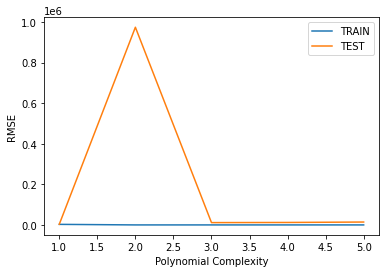

In [29]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [30]:
from sklearn.linear_model import Ridge

In [31]:
model = Ridge(alpha=0.1)
model.fit(scaled_X_train,y_train)

Ridge(alpha=0.1)

In [32]:
y_pred = model.predict(scaled_X_test)

In [33]:
mean_squared_error(y_test,y_pred)

71359382.42151019

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
param_grid = {'alpha':[0.1,1,5,10,50,100]}

In [36]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5
                       )

In [37]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(alpha=0.1),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100]},
             scoring='neg_mean_squared_error')

In [38]:
grid_model.best_estimator_

Ridge(alpha=100)

In [39]:
grid_model.best_params_

{'alpha': 100}

In [40]:
y_pred = grid_model.predict(scaled_X_test)

In [41]:
mean_squared_error(y_test,y_pred)

63863616.336390324

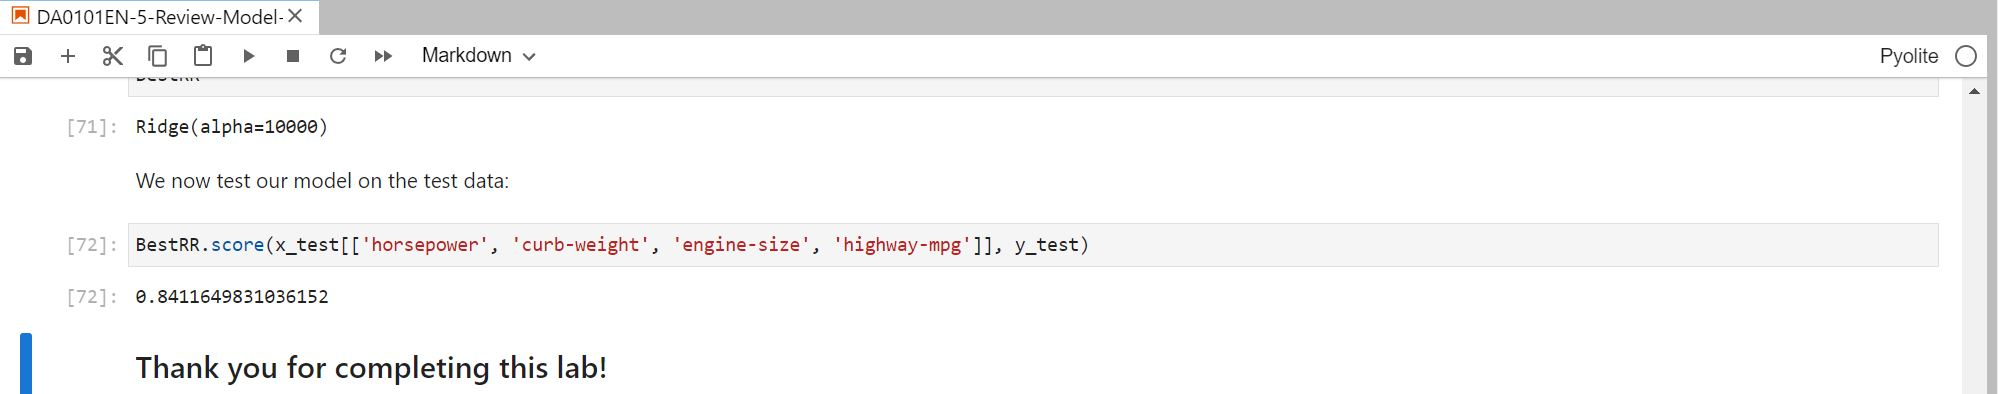

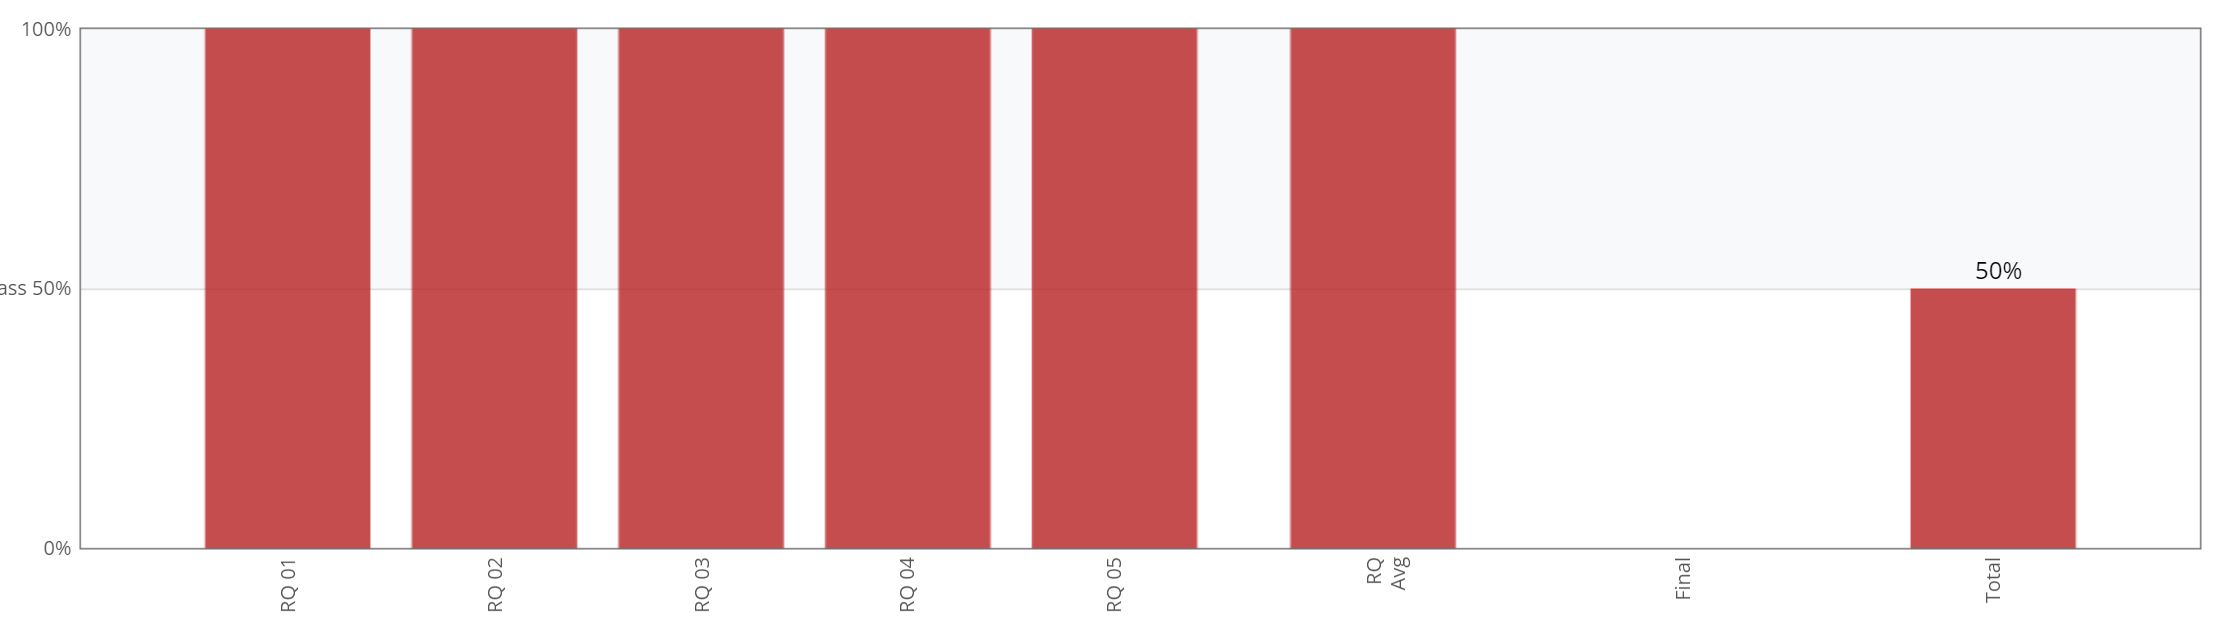